# Task 1. Set up an "Analysis Pipeline" 
My partner and I both completed Task 1 and Task 2 together. We participated in peer programming to ensure we set up a promising analysis pipeline. Additionally, we made sure the method chaining works so the data is processed well and other attributes from project_functions are used. 

In terms of the Analysis Pipeline, we removed unnecessary columns and renamed the `Duration` column to `Duration (Minutes).` Also, we converted all the entries in the newly created `Duration (Minutes)` column into the minutes unit of time instead of having both hours and minutes. 

# Task 2. Can be found under the scripts -> project_functions.py

For the method chaining, JQ and I set up the file structure. JQ worked on the core method #1 and method #2 chaining components. While I (Guy) created all the "Pythonic" methods, JQ and I integrated them with pandas.  

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../scripts/')
import project_functions as pf
from pandas_profiling import ProfileReport

## Test functions that are used in the project_functions.py  

In [2]:
def returnList(df, column):
    return df[column].tolist()

def countOccurances(listOfGenres):
    counts = {}
    for key in listOfGenres:
        if key in counts:
            counts[key] += 1
        else:
            counts[key] = 1
    return counts

def countWordsInDict(dictonary):
    counts = {}
    for key in dictonary:
        words = key.split(', ')
        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

# Task 3. Exploratory Data Analysis (EDA) 

My partner and I both completed an EDA independently to explore different features of our dataset. Additionally, we informed each other about discoveries to learn more information about our dataset. 

### Loading the clean data using the load_and_process attribute from project_functions.py


In [3]:
# storing our dataset in df variable and processing it and using the load and process function located in the project functions to clean it up
df = pf.load_and_process(pd.read_csv('../../data/raw/anime.csv'))

df_raw = pd.read_csv('../../data/raw/anime.csv')

## Examining the Data Before to Clean Up

It is nice to compare the differences between the raw and clean data. The raw data has 35 columns and 17562 rows.

We will notice a quick change shortly. 

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

## Fundamental Column Information

This dataset has 30 columns and 3306 rows. The row count has reduced significantly from the original of 17562. 

In [5]:
# # General information from our dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 0 to 17469
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                3306 non-null   object
 1   Score               3306 non-null   object
 2   Genres              3306 non-null   object
 3   Type                3306 non-null   object
 4   Episodes            3306 non-null   object
 5   Aired               3306 non-null   object
 6   Premiered           3306 non-null   object
 7   Studios             3306 non-null   object
 8   Source              3306 non-null   object
 9   Duration (Minutes)  3306 non-null   object
 10  Rating              3306 non-null   object
 11  Ranked              3306 non-null   object
 12  Popularity          3306 non-null   int64 
 13  Members             3306 non-null   int64 
 14  Favorites           3306 non-null   int64 
 15  Watching            3306 non-null   int64 
 16  Completed           330

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Studios,Source,Duration (Minutes),...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,24,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,24,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,25,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,23,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,Gallop,Manga,23,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0


## Here are all the columns

In [6]:
df.columns

Index(['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Aired', 'Premiered',
       'Studios', 'Source', 'Duration (Minutes)', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8',
       'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2',
       'Score-1'],
      dtype='object')

## Examining the Data Using Statistical Points

A neat point to notice here is that the data was scraped from the website, with the minimum number of people watching (from our clean dataset) at 12. This means that anime is so popular that even casual watchers are still watching multiple animes at once.   

In [7]:
df.describe()

,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,3306.000000,3.306000e+03,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000
mean,3386.106473,1.361595e+05,2090.861162,9885.641258,8.588078e+04,4314.740472,5505.506050,30572.842408
std,2960.277736,2.491431e+05,8684.466169,26374.033754,1.848136e+05,8286.632403,9230.437097,43747.139267
min,1.000000,3.630000e+02,0.000000,12.000000,0.000000e+00,4.000000,16.000000,102.000000
25%,1026.750000,9.833750e+03,22.000000,525.000000,3.774000e+03,386.250000,570.000000,3238.500000
50%,2525.500000,4.042300e+04,141.000000,2430.000000,1.887650e+04,1551.000000,2216.000000,12547.000000
75%,4940.750000,1.447902e+05,836.250000,9132.250000,7.736550e+04,4880.750000,6951.000000,40112.000000
max,12953.000000,2.589552e+06,183914.000000,566239.000000,2.182587e+06,130961.000000,174710.000000,425531.000000


## The number of Unique contents each column contains 

In [8]:
df.nunique(axis = 0)

Name                  3306
Score                  408
Genres                2079
Type                     1
Episodes               153
Aired                 2542
Premiered              203
Studios                489
Source                  15
Duration (Minutes)      37
Rating                   5
Ranked                2863
Popularity            2801
Members               3253
Favorites             1340
Watching              2609
Completed             3150
On-Hold               2455
Dropped               2587
Plan to Watch         3147
Score-10              2221
Score-9               2331
Score-8               2674
Score-7               2825
Score-6               2652
Score-5               2379
Score-4               1849
Score-3               1352
Score-2               1003
Score-1                956
dtype: int64

## Exploring the Dataset

In [9]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Popularity,3306.0,3386.106473,2960.277736,1.0,1026.75,2525.5,4940.75,12953.0
Members,3306.0,136159.507562,249143.072151,363.0,9833.75,40423.0,144790.25,2589552.0
Favorites,3306.0,2090.861162,8684.466169,0.0,22.00,141.0,836.25,183914.0
Watching,3306.0,9885.641258,26374.033754,12.0,525.00,2430.0,9132.25,566239.0
Completed,3306.0,85880.777374,184813.635559,0.0,3774.00,18876.5,77365.50,2182587.0
On-Hold,3306.0,4314.740472,8286.632403,4.0,386.25,1551.0,4880.75,130961.0
Dropped,3306.0,5505.506050,9230.437097,16.0,570.00,2216.0,6951.00,174710.0
Plan to Watch,3306.0,30572.842408,43747.139267,102.0,3238.50,12547.0,40112.00,425531.0


In [10]:
df.describe(exclude = [np.number]).T

,count,unique,top,freq
Name,3306,3306,Cowboy Bebop,1
Score,3306,408,7.36,26
Genres,3306,2079,"Slice of Life, Comedy",41
Type,3306,1,TV,3306
Episodes,3306,153,12,1131
Aired,3306,2542,"Oct 5, 2016 to Dec 21, 2016",9
Premiered,3306,203,Fall 2016,67
Studios,3306,489,Toei Animation,164
Source,3306,15,Manga,1298
Duration (Minutes),3306,37,24,1384


In [11]:
df.describe(include = ['object']).T

,count,unique,top,freq
Name,3306,3306,Cowboy Bebop,1
Score,3306,408,7.36,26
Genres,3306,2079,"Slice of Life, Comedy",41
Type,3306,1,TV,3306
Episodes,3306,153,12,1131
Aired,3306,2542,"Oct 5, 2016 to Dec 21, 2016",9
Premiered,3306,203,Fall 2016,67
Studios,3306,489,Toei Animation,164
Source,3306,15,Manga,1298
Duration (Minutes),3306,37,24,1384


In [12]:
df.describe(exclude = 'object').T

,count,mean,std,min,25%,50%,75%,max
Popularity,3306.0,3386.106473,2960.277736,1.0,1026.75,2525.5,4940.75,12953.0
Members,3306.0,136159.507562,249143.072151,363.0,9833.75,40423.0,144790.25,2589552.0
Favorites,3306.0,2090.861162,8684.466169,0.0,22.00,141.0,836.25,183914.0
Watching,3306.0,9885.641258,26374.033754,12.0,525.00,2430.0,9132.25,566239.0
Completed,3306.0,85880.777374,184813.635559,0.0,3774.00,18876.5,77365.50,2182587.0
On-Hold,3306.0,4314.740472,8286.632403,4.0,386.25,1551.0,4880.75,130961.0
Dropped,3306.0,5505.506050,9230.437097,16.0,570.00,2216.0,6951.00,174710.0
Plan to Watch,3306.0,30572.842408,43747.139267,102.0,3238.50,12547.0,40112.00,425531.0


In [ ]:
ProfileReport(df, title="Pandas Profiling Anime Report")

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

### A table of how many people enjoy the source of the anime contents

In [12]:
df.groupby('Source',as_index = False).sum()

,Source,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,4-koma manga,434897,12534764,106100,740490,7583585,411220,540491,3258978
1,Book,196464,388492,2468,19553,199114,18371,24151,127303
2,Card game,226296,1253270,4536,95271,623277,45964,77063,411695
3,Digital manga,30364,234046,656,14104,126031,5493,13658,74760
4,Game,886367,11270427,67420,842670,6041610,464866,902368,3018913
5,Light novel,406137,101337957,1206985,6715280,68411567,2485359,3546766,20178985
6,Manga,3851346,215279599,3682954,17247124,137740891,7082309,8215449,44993826
7,Music,84701,637843,5140,41057,341139,23294,35348,197005
8,Novel,528662,7918581,126059,622705,3730476,331367,421607,2812426
9,Original,3499163,60622567,1084168,3901210,35140452,2249951,2771022,16559932


# Task 4. Conduct Analysis to Help Answer Research Questions

The questions I am in charge of answering is:

1. Finding the most popular genre combination of animes2. Finding the most popular genre combination of animes

2. Finding the correlation between the rating of an anime and the number of episodes produced: We want to see how the number of episodes of an anime affects its rating.

### 1. Finding the Most Popular Genre Combination of Animes by Number of Completions 

In [140]:
genre_combo_df = df.groupby('Genres', as_index = False).sum()[['Genres','Completed']].sort_values(by = 'Completed', ascending = False)
genre_combo_df

,Genres,Completed
548,"Action, Military, Mystery, Super Power, Drama,...",4511947
422,"Action, Game, Adventure, Romance, Fantasy",4058966
291,"Action, Comedy, Super Power, School, Shounen",3114497
1497,"Ecchi, School, Shounen",2844561
1926,"Slice of Life, Comedy, Drama, Romance, School",2840098
...,...,...
1338,"Comedy, Sports, Drama, School",7
1260,"Comedy, Psychological, Supernatural, Shounen",7
1690,"Military, Sci-Fi, Slice of Life, Comedy",5
1840,"Sci-Fi, Adventure, Mystery, Fantasy, Shoujo Ai",2


Text(0.5, 1.0, 'The Most Completed Anime by Genre Combinations')

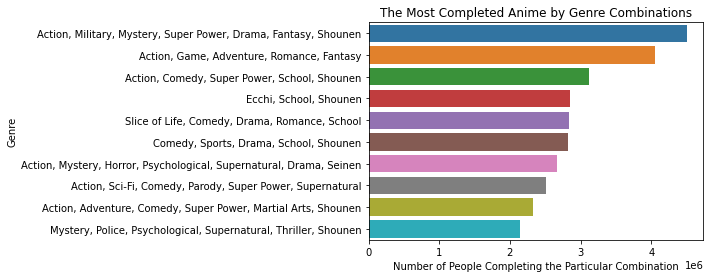

In [141]:
sns.barplot(x = 'Completed', y = 'Genres', orient = 'h', data = genre_combo_df.head(10))
plt.xlabel("Number of People Completing the Particular Combination")
plt.ylabel("Genre")
plt.title("The Most Completed Anime by Genre Combinations")

# plot them
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'Count', y = 'Genre', data = df_genre_combo.head(10))


### 2. Find the Best Anime Based on Weighted Scores (50% Popularity, 50% Ranked)
score and popularity (xtra)
popularity and rank (xtra)